# 图像特效-挤压

In [2]:
from scipy import signal
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [3]:
src = cv2.imread('../datas/face2.jpg')
gray = cv2.imread('../datas/face2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [4]:
def pinch(src,degree = 16.):
    if degree < 1:
        degree = 1
    if degree > 32:
        degree = 32
    srcf = np.float32(src)
    if len(src.shape) < 3:
        srcf = cv2.cvtColor(src,cv2.COLOR_GRAY2RGB)
    dst = np.zeros_like(srcf)
    
    height,width = srcf.shape[0],srcf.shape[1]
    midX = width/2
    midY =height/2
    
    for i in range(height):
        for j in range(width):
            offsetX = j-midX
            offsetY = i- midY
            radian = math.atan2(offsetY, offsetX)
            radius = np.sqrt((offsetX*offsetX + offsetY*offsetY))
            radius = np.sqrt(radius)*degree
            
            X = int((radius*np.cos(radian))+midX)
            Y = int((radius*np.sin(radian))+midY)
            
            if  X<0 :
                X = 0
            if  X>= width:
                X = width - 1
            if Y < 0:
                Y = 0
            if Y >= height:
                Y = height - 1
            dst[i,j] = srcf[Y,X]
    return np.uint8(dst)

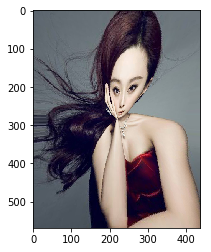

In [5]:
dst = pinch(rgb)
plt.imshow(dst)